# Análisis de imágenes

El objetivo de este notebook es muy modesto: mostrar qué es una imagen para la computadora y conocer algunas de las operaciones que podemos hacer sobre ella en términos matriciales. No llega a siquiera ser una introducción al tema.

Existen - por supuesto - varias librerías para trabajar con imágenes:
1. PIL - Python Imaging Library - es una de las más conocidas, cuya distribución más común es, actualmente, [Pillow](https://pillow.readthedocs.io/en/stable/). 
1. OpenCV es una librería muy conocida para Visión por Computadora (Computer Vision). La versión original está en C++, pero existen distribuciones para Python. Tal vez no es tan fácil usarla directamente, pero verás que muchas librerías de Python lo que hacen, en el fondo, es llamar a rutinas de OpenCV.
1. Una librería interesante para tener en cuenta es [Scikit-Image](https://scikit-image.org/docs/stable/user_guide.html).

Y muchas librerías más. Los entornos de desarrollo para redes neuronales que mencionamos el encuentro anterior también sirven para trabajar con imágenes. Pero, cuando tenemos en cuenta que una imagen es simplemente una (bueno, tres) matrices, hasta NumPy es útil para operar sobre ellas.

## 1. Algunos ejemplos

Elige cualquier imagen que te interese y sigue los pasos a continuación. Si no lo hiciste aún, antes instala Pillow.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

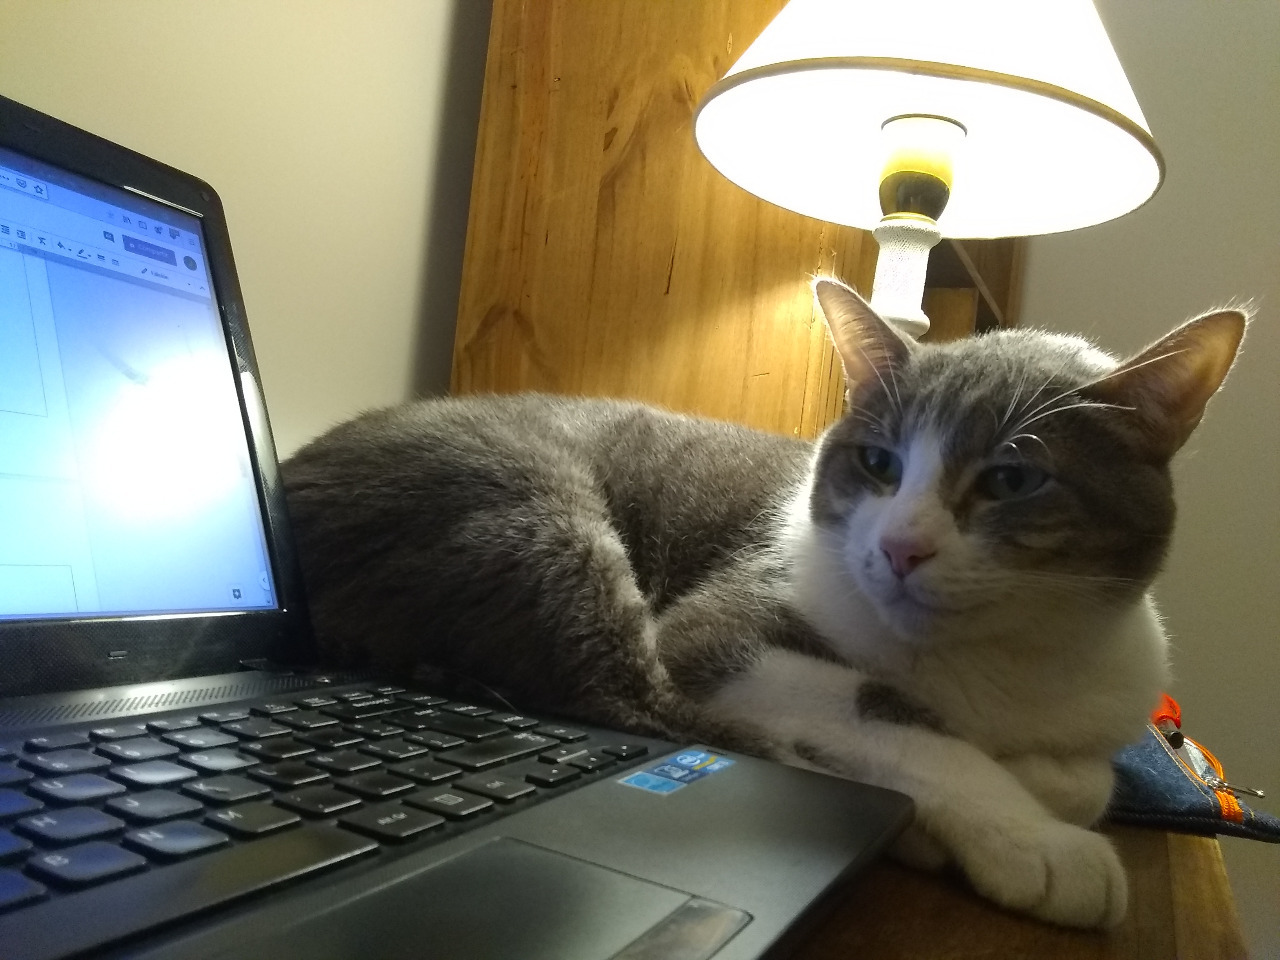

In [2]:
img = Image.open('domo_despierto.jpeg')
img

Pasa la imagen a un arreglo de NumPy es inmediato.

In [3]:
data = np.array(img)
print(data.shape)

(960, 1280, 3)


Prestar atención al `shape` de la imagen. ¿Qué representa cada eje?

Imprimamos en pantalla el máximo y el mínimo del arreglo. 

In [4]:
print(data.max())
print(data.min())

255
0


¿Te dicen algo esos valores? Investiga [aquí](https://es.wikipedia.org/wiki/Profundidad_de_color).

También podemos usar matplotlib para visualizar la imagen.

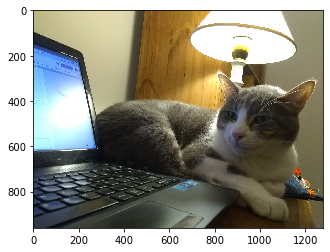

In [5]:
plt.imshow(data)
plt.show()

Pero podemos hacer más. Por ejemplo, ver cada banda de la imagen. Esto lo podemos hacer de varias formas. Una forma sencilla es mantener las tres bandas, pero poner ceros en las bandas que no queremos visualizar. Por ejemplo:

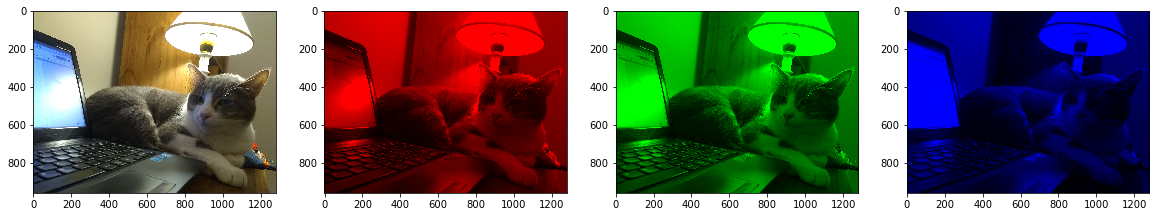

In [6]:
plt.figure(figsize = (20,5))

plt.subplot(1,4,1)
plt.imshow(data)

for i in range(3):
    plt.subplot(1,4,i+2)
    imagen_banda = np.zeros(data.shape, dtype = np.uint8)
    imagen_banda[:,:,i] = data[:,:,i]
    plt.imshow(imagen_banda)
plt.show()

Podemos hacer algunas pruebas. ¿Cómo se ve la imagen si borramos una banda?

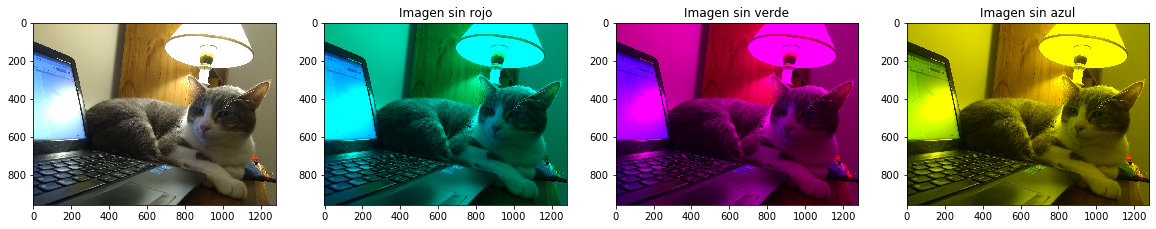

In [7]:
plt.figure(figsize = (20,5))

plt.subplot(1,4,1)
plt.imshow(data)

bandas = ['rojo', 'verde', 'azul']
for i in range(3):
    plt.subplot(1,4,i+2)
    imagen_banda = data.copy()
    imagen_banda[:,:,i] = np.zeros(imagen_banda[:,:,i].shape)
    plt.title(f'Imagen sin {bandas[i]}')
    plt.imshow(imagen_banda)
plt.show()

O también podemos pasar a escala de grises (comúnmente conocido como blanco y negro). Esto se logra combinando las bandas en una única banda (gris)

$Y = w_R R + w_G G + w_B B$

donde $w_R$, $w_G$ y $w_B$ son los pesos asignados a cada banda. Una elección común es $w_R = 0.2125$, $w_G = 0.7154$ y $w_B = 0.0721$. Notar que los pesos suman 1. Además, los pesos suelen ser $w_G > w_R > w_B$, ya que está asociado a como los humanos percibimos cada color, siendo nuestros ojos más sensibles al verde que a los otros colores.


In [8]:
def rgb2gray(rgb, weights):
    gray = weights[0]*rgb[:,:,0] + weights[1]*rgb[:,:,1] + weights[2]*rgb[:,:,2]
    return gray

imagen_gris = rgb2gray(data, [0.2125, 0.7154, 0.0721])   # otros pesos posibles [0.2989, 0.5870, 0.1140]

Veamos el `shape`

In [9]:
print(imagen_gris.shape)

(960, 1280)


¡Ahora tiene una sola banda! Visualicemos:

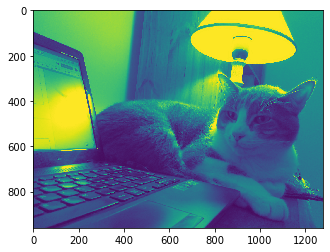

In [10]:
plt.imshow(imagen_gris)

¡No se ve en como una imagen blanco y negro! Esto es porque, si bien la imagen ya contiene una sola banda, al momento de visualizar también tenemos que determinar una escala. Puedes ver las escalas disponibles [aquí](https://matplotlib.org/tutorials/colors/colormaps.html)

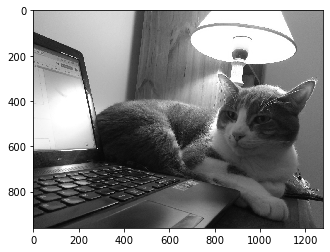

In [11]:
plt.imshow(imagen_gris, cmap=plt.get_cmap('gray'))

Podemos ver cómo queda la imagen en blanco y negro asignando distintos pesos a cada banda. Por ejemplo, quedándonos únicamente con cada una de ellas.

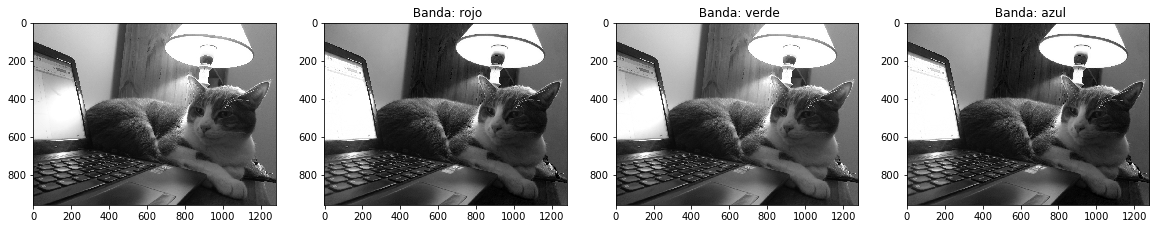

In [12]:
plt.figure(figsize = (20,5))

plt.subplot(1,4,1)
plt.imshow(imagen_gris, cmap=plt.get_cmap('gray'))

bandas = ['rojo', 'verde', 'azul']
for i in range(3):
    plt.subplot(1,4,i+2)
    if i == 0:
        imagen_banda = rgb2gray(data, [1, 0, 0]) 
    if i == 1:
        imagen_banda = rgb2gray(data, [0, 1, 0]) 
    else:
        imagen_banda = rgb2gray(data, [0, 0, 1]) 
    plt.title(f' Banda: {bandas[i]}')
    plt.imshow(imagen_banda, cmap=plt.get_cmap('gray'))
plt.show()

## 2. Convolución

La convolución es una operación que podemos hacer sobre una imagen para modificarla. Por ejemplo, resaltar ciertas lineas, hacerla más o menos nítida, etc. Esta operación necesita un *kernel*, que definirá la operación a realizar. El kernel es una matriz, y la operación que hace sobre la imagen es del tipo *rolling window*.  Puedes leer más [aquí](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

Daremos dos demostraciones de una convolución

In [13]:
from scipy import signal

In [14]:
kernel_v = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel_h = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

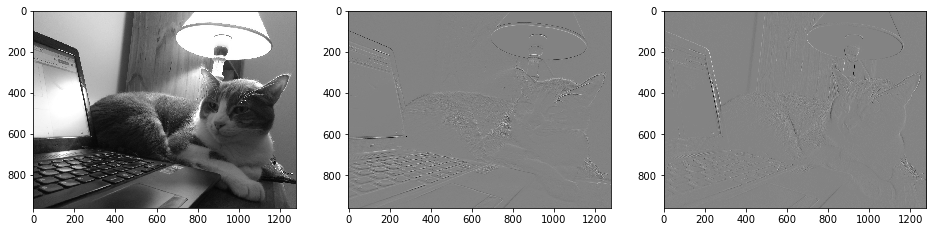

In [15]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
plt.imshow(imagen_gris, cmap=plt.get_cmap('gray'))

imagen_convolved = signal.convolve2d(imagen_gris, kernel_v, mode = 'valid')
plt.subplot(1,3,2)
plt.imshow(imagen_convolved, cmap=plt.get_cmap('gray'))

imagen_convolved = signal.convolve2d(imagen_gris, kernel_h, mode = 'valid')
plt.subplot(1,3,3)
plt.imshow(imagen_convolved, cmap=plt.get_cmap('gray'))

plt.show()

Presta mucha atención y trata de descubrir qué hace cada kernel.

## 3. Neural Style Transfer

El siguiente código fue adaptado de la documentación de [keras](https://keras.io/examples/generative/neural_style_transfer/). Solamente tradujimos parte del texto y ampliamos donde consideramos necesario. Ejecuta esta parte del notebook en Colab. Y, para que ejecute en un tiempo razonable, debes ir a Runtime->Change runtime type y elige GPU o TPU. ¿Qué es?

No hace falta que entiendas el código completamente, pero intenta prestarle atención. El objetivo es solamente ver qué se puede hacer.

**Un poco de contexto:**

La transferencia de estilo (style transfer) consiste en generar una imagen con el mismo "contenido" que una imagen base, pero con el "estilo" de una imagen diferente (típicamente artística). Esto se logra mediante la optimización de una función de costo que tiene 3 componentes: "costo de estilo", "costo de contenido" y "costo de variación total":

- El costo de variación total impone una continuidad espacial local entre los píxeles de la imagen combinada, dándole coherencia visual.
- El costo de estilo captura información de color / textura a diferentes escalas espaciales a partir de la imagen de estilo.
- El costo de contenido mantiene la imagen generada lo suficientemente cerca de la original en cuanto a contenido. Por ejemplo, si la imagen original contiene un perro, hace que la imagen generada siga conteniendo un perro.

El paper original es [A Neural Algorithm of Artistic Style](http://arxiv.org/abs/1508.06576).



In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import vgg19

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

Elegimos las imágenes que vamos a usar: la imagen de base (contenido) y la imagen de estilo.

In [ ]:
base_image_path = keras.utils.get_file("paris.jpg", "https://i.imgur.com/F28w3Ac.jpg") ### MODIFICAR CUANDO ELIJAS TUS IMÁGENES
plt.figure(figsize = (8,6))
plt.imshow(plt.imread(base_image_path))
plt.show()


In [ ]:
style_reference_image_path = keras.utils.get_file("starry_night.jpg", "https://i.imgur.com/9ooB60I.jpg" ) ### MODIFICAR CUANDO ELIJAS TUS IMÁGENES
plt.figure(figsize = (8,6))
plt.imshow(plt.imread(style_reference_image_path))
plt.show()

Y cómo vamos a guardar la imagen que se generen

In [ ]:
result_prefix = "paris_generated"  ### MODIFICAR CUANDO ELIJAS TUS IMÁGENES

Luego, algunos parámetros de la corrida y de la imagen generada

In [ ]:
# Weights of the different loss components
total_variation_weight = 1e-6
style_weight = 1e-6
content_weight = 2.5e-8

# Dimensions of the generated picture.
width, height = keras.preprocessing.image.load_img(base_image_path).size
img_nrows = 400
img_ncols = int(width * img_nrows / height)

### VGGNet

VGGNet es una red neuronal (en realidad hay varias disponibles) pre-entrenada que puede descargarse de internet. Recomendamos buscar cómo fue entrenado y para qué problema. En esta aplicación no es necesario seguir entrenando la red, sino solamente usarla para procesar las imágenes.

Definimos algunas funciones necesarias para trabajar con las imágenes y adaptamos las imágenes al *formato* que requiere la red (tensor):

In [ ]:
def preprocess_image(image_path):
    # Util function to open, resize and format pictures into appropriate tensors
    img = keras.preprocessing.image.load_img(
        image_path, target_size=(img_nrows, img_ncols)
    )
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return tf.convert_to_tensor(img)


def deprocess_image(x):
    # Util function to convert a tensor into a valid image
    x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype("uint8")
    return x

### Funciones de Costo

Definimos las funciones de costo y algunas funciones auxiliares. Las más importantes son:

- La función de costo de estilo, `style_loss`, que hace que la imagen generada tenga una texutura cercana a la imagen de estilo de referencia. 
- La función de costo de contenido, `content_loss`, que hace que el contenido de la imagen generada sea similar al contenido de la imagen de base.
- La función `total_variation_loss` es una funcióón de regularización, que mantiene la imagen generada localmente coherente. 

In [ ]:
# The gram matrix of an image tensor (feature-wise outer product)
def gram_matrix(x):
    x = tf.transpose(x, (2, 0, 1))
    features = tf.reshape(x, (tf.shape(x)[0], -1))
    gram = tf.matmul(features, tf.transpose(features))
    return gram


# The "style loss" is designed to maintain
# the style of the reference image in the generated image.
# It is based on the gram matrices (which capture style) of
# feature maps from the style reference image
# and from the generated image


def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_nrows * img_ncols
    return tf.reduce_sum(tf.square(S - C)) / (4.0 * (channels ** 2) * (size ** 2))


# An auxiliary loss function
# designed to maintain the "content" of the
# base image in the generated image


def content_loss(base, combination):
    return tf.reduce_sum(tf.square(combination - base))


# The 3rd loss function, total variation loss,
# designed to keep the generated image locally coherent


def total_variation_loss(x):
    a = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, 1:, : img_ncols - 1, :]
    )
    b = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, : img_nrows - 1, 1:, :]
    )
    return tf.reduce_sum(tf.pow(a + b, 1.25))

Cargamos la red. **Notar el** `include_top = False`. ¿A qué se deberá? Puede tardar un poco mientras lo descarga.

In [ ]:
# Build a VGG19 model loaded with pre-trained ImageNet weights
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])

# Set up a model that returns the activation values for every layer in
# VGG19 (as a dict).
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict)


Definimos la función que calcula el costo, combinando las funciones que definimos más arriba.

In [ ]:
# List of layers to use for the style loss.
style_layer_names = [
    "block1_conv1",
    "block2_conv1",
    "block3_conv1",
    "block4_conv1",
    "block5_conv1",
]
# The layer to use for the content loss.
content_layer_name = "block5_conv2"


def compute_loss(combination_image, base_image, style_reference_image):
    input_tensor = tf.concat(
        [base_image, style_reference_image, combination_image], axis=0
    )
    features = feature_extractor(input_tensor)

    # Initialize the loss
    loss = tf.zeros(shape=())

    # Add content loss
    layer_features = features[content_layer_name]
    base_image_features = layer_features[0, :, :, :]
    combination_features = layer_features[2, :, :, :]
    loss = loss + content_weight * content_loss(
        base_image_features, combination_features
    )
    # Add style loss
    for layer_name in style_layer_names:
        layer_features = features[layer_name]
        style_reference_features = layer_features[1, :, :, :]
        combination_features = layer_features[2, :, :, :]
        sl = style_loss(style_reference_features, combination_features)
        loss += (style_weight / len(style_layer_names)) * sl

    # Add total variation loss
    loss += total_variation_weight * total_variation_loss(combination_image)
    return loss



### Descenso por gradiente

Función para hacer descenso por gradiente

In [ ]:
@tf.function
def compute_loss_and_grads(combination_image, base_image, style_reference_image):
    with tf.GradientTape() as tape:
        loss = compute_loss(combination_image, base_image, style_reference_image)
    grads = tape.gradient(loss, combination_image)
    return loss, grads



### Entrenamiento

La generación de la imagen es por iteraciones. Cada 100 iteraciones guarda una versión de la imagen generada.

In [ ]:
optimizer = keras.optimizers.SGD(
    keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=100.0, decay_steps=100, decay_rate=0.96
    )
)

base_image = preprocess_image(base_image_path)
style_reference_image = preprocess_image(style_reference_image_path)
combination_image = tf.Variable(preprocess_image(base_image_path))

iterations = 4000
for i in range(1, iterations + 1):
    loss, grads = compute_loss_and_grads(
        combination_image, base_image, style_reference_image
    )
    optimizer.apply_gradients([(grads, combination_image)])
    if i % 100 == 0:
        print("Iteration %d: loss=%.2f" % (i, loss))
        img = deprocess_image(combination_image.numpy())
        fname = result_prefix + "_at_iteration_%d.png" % i
        keras.preprocessing.image.save_img(fname, img)


In [ ]:
from IPython.display import Image, display

display(Image(result_prefix + "_at_iteration_4000.png"))


Ahora, elige dos imágenes una de base - contenido - y otra de estilo, y genera tu propia imagen. Puede ser:
- Una imagen de tu mascota.
- Una fotografía de la comisión.
- Una fotografía de unas vacaciones con tus amigos/as, pareja, solo/a, etc.